# T-Testing & Hypothesis Testing
***


Point estimates and confidence intervals are basic tools for hypothesis testing. Statistical hypothesis testing is used to detrmine whether observed data deviates from the expected data. The scipy.stas library contains many functions that we can use to carry out this hypothesis testing.


Statistical hypothesis tests are based on a statement called a null hypothsis, this assumes that nothing of note is ocurring between the test varialbes. So if you are analysing if two groups are different, the null hypothesis of this would be that the groups would be the same. In practice, if you wanted to test idf the average age of one premier league football team is differnt from the leagues average, the null hypothesis would be that the average ages of both are the same. 


The purpose of hypothesis testing is to determine if the null hypothesis  is likely to be true given the sample data provided. If the data cannot make a compelling argument against the null hypothesis, it is accepted to be true. If the argument posed is quite compelling, you will infer that somthign of value or interesting is ocurring within the data. A new hypothesis will be formed, as above it would be that the average age of the team does, in fact, differ from the mean of the league average. 



With the null & alternative hypothesis defined, we must denote a significance level ($\alpha$), this is a probability  threshold at which we will reject the null hypothesis. If the probability of getting a result as extreme as the one observed due to chance, then the null hypothsis is rejected in favour of the alternative. The probability of seeing a result as or more extreme than the one observed is known as the p-value.



A T-test is the statistical test used to detrmine if a data sample differs from the population, or whether two samples differ from eachother. 

<br>

## One Sample T-test
***

Checks if a group of sample data differ from the population mean. Below I will create some sample data to run this t_test on, and we will see it in practice, but first let's import some python pacakges we will be using in this sheet.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from numpy.random import default_rng

Below I am going to simulate some data, two sets of populations, one large group, and one smaller, a theortical sample taken from the population. We want to carry out a statistical hypothesis test to validate that the average age of our "Ros" sample is lower than that of the over all "Pop" data. We know that the overall average is lower, as we have constructed this data to reflect this difference. Will the statitical test flag that there is a significant difference within this data?

We know the two means of each dataset are different, so the Null hypotheses that the samples come from the same distribution is not valid, however we will show this using statistical testing.

In [2]:
#set the seed so test is exacly replicable
np.random.seed(42)

pop_ages1 = stats.poisson.rvs(loc=18, mu = 35, size = 150000)
pop_ages2 = stats.poisson.rvs(loc=18, mu = 10, size = 100000)
pop_ages = np.concatenate((pop_ages1, pop_ages2))

ros_ages1 = stats.poisson.rvs(loc=18, mu = 30, size = 30)
ros_ages2 = stats.poisson.rvs(loc=18, mu = 10, size = 20)
ros_ages = np.concatenate((ros_ages1, ros_ages2))

In [3]:
print(pop_ages.mean())
print(ros_ages.mean())

42.998628
39.72


Below we will conduct a 95% confidence level T-test to see if it will rightly reject the null hypothesis that the samples come from the same disteibution as the population. We will use the [stats.ttest_1samp()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) function to do this. 

>"This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean." REF 1

In the below, the arguments are:

_a_ - this is our sample data to bop compared.

_popmean_ - this is the mean that the sample date is being compared to.

Within the results we will be prodivded with a p-value, this p-value is the probability that we will see a result to the extreme of the one observed due to chance. 

In [4]:
stats.ttest_1samp(a = ros_ages, popmean = pop_ages.mean()) 

Ttest_1sampResult(statistic=-2.1502410346712346, pvalue=0.03649747507423559)

So in our case above, there would be roughly a 3.6% chance that there is something of interest within the data, i.e that the null hypothesis can be rejected. 

The statistic (t-statistic) result of roughly -2.15 here means how much our sample mean deviates from the population mean. If the t-statistic lies outside the quantiles of the t-distribution coresponding to our confidence level and degrees of freedom, we reject the null hypothsis. Essentially, if we see a result that is "exterme" enough, something of interest is going on within the data. 

To check the quantiles, we will use [stats.t.ppf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html), with our 95% confidence interaval, we will have 2.5% in both the bottom & top tails, these will be out q or quantile vlaues. df = degres of freedom, and it is our sample size minus one, or n-1, which will be 49 (len(ros_ages)-1). 

In [5]:
(len(ros_ages)-1)

49

In [6]:
# lower quantile
stats.t.ppf(q=0.025, df= 49)

-2.0095752344892093

In [7]:
# upper quantile inverse of the lower
stats.t.ppf(q=0.975, df= 49)

2.009575234489209

Ok, so if our t_statistic lies outside of the above range(+/- of the mean), we can accept our alternative hyptothesis as the result we have observed is far enough away from our population mean that we can consider it different. In this case we can accept that the mean of our ros sample is different to our pop data. We have confirmed, in a statistical manner, what we set our data up to reflect.

## Two Sample T-test
***

Another type of test we can carry out is that of comparing another similar sample to our "ros" from above, rather than testing against the known populations in the pop, we will compare the two sample means. The [stats.ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function. Firstly we will need to create this sample dataset, we'll call it "gal". Our a argument for the independent test will be our "ros" data, and the b will be our "gal" data. The equal_var will be false, this lets you specify if the arguments have equal variance.

In [8]:
np.random.seed(42)

gal_ages1 = stats.poisson.rvs(loc=18, mu = 33, size = 30)
gal_ages2 = stats.poisson.rvs(loc=18, mu = 13, size = 20)
gal_ages = np.concatenate((gal_ages1, gal_ages2))

In [9]:
gal_ages.mean()

42.44

In [10]:
stats.ttest_ind(a = ros_ages,
               b = gal_ages,
               equal_var = False)

Ttest_indResult(statistic=-1.2870506937293775, pvalue=0.20111338521248417)

So our p-value would indicate a 20% chance of the two groups of data were identical if the samples provided are this different. While using a 95% confidence level, the null hypothesis would stand, and we would reject the alternative hypothesis, due to a p-value greater than our significane level of 5%.

## Type I and Type II Errors
***

A statistical hypothesis test and call on whether to reject the null hypothesis explored above, is not infallible, it provides statistical evidence upon which a conclusion to accept or reject the hypothesis is made. When this decision is incorrect, it falls into one of two categories, type I & type II errors.

A type I error is when the null hypothesis is wrongly rejected, and is often called a "false positive" or  "false hit". The significance level ($\alpha$) is the rate of getting a false positive, so having a higher confidence level will  reduce the chances of running into a type I error. 

Type II errors occur when there is a failure to reject the null hypthesis when it is actually false, commonly known as a "false negative" or a "miss". The higher the confidence level, the greater your risk of making a type II error. 


In laymans terms a type I error is when a fire alarm sounds, but there is no fire present in the building, where as a type II error would be the inverse, when a fire is in the building, but the fire alarm has not sounded.


## Statistical Power
***

Statistical power is the probability that a statistical test carried out will correctly detect that something interesting is going on with the data provided, i.e when the null hypothesis is rejected. Power is often calculated and reported when an experiment is completed, as part of comment on the confidence on has in the results, it also can be used as an estimator of the number of the sample size required in order to detect an effect.

Statistical power is essenitally the probability of accepting the alternative hypothesis. Setups with low statistical power have a large risk of a type II error being committed, a high statitical power has the opposite effect. Therefore it is equal to 1 minus the type II error rate, and is influenced by:

- Significance level of the test

Determining the significane level of a test leaves you in a situation of choosing between your exposure to a type I or type II error, a larger significane level leads to more type I errors than that with a lower signficance level. The common convention is to have it so the power level of the experiment is at 0.80. 

- Sample size

The larger the sample size the less uncerainty, less tpye II error rates, and an increased power. 

- Effect size of the test[3]

In essence it is the coreelation between the varaibles in the population, often caculated using a specific statistical measure like Pearsons correlation coefficient, or Cohen's d for the difference between groups. In terms of T-tests, we can take effect size to mean the difference in the mean of the samples in terms of standard deviations, so an effect size of 0.5 would mean that a sample mean is 0.5 standard deviations from the other. 

Combining statistical power with the above 3 factors, we can perform a power analysis. This involves estimating one of the four parameters, given values for the other 3. The most common use of a power analysis is to estimate the minimum sample size required for an experiment. It is possible to perform multiple power analyses and copmpare parameters vs each other, graphing the relationships. 

Below we will see how to calculate the mimimum sample size, and how the sample size can have an effect on statistical power.

In [11]:
# import power analysis class
from statsmodels.stats.power import tt_solve_power

samples = tt_solve_power(effect_size = 0.8,
              alpha = 0.05,
              power = 0.8)

print(f"Samples size = {samples:.2f}")

Samples size = 14.30


Given the parameters above, we can see that the minimum sample size required would be 14 to make a study with the desired power and signifincane level to see an effect of  the specified size.

Below we can see the effect of sample size and effect sizes (low(0.2), medium(0.5) and high(0.8)) on statistical power (y-axis). 

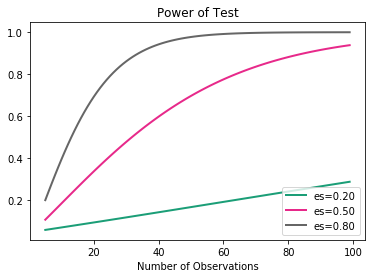

In [12]:
# Below URL is the source forthe below code
#https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# Set parameters, 3 effect sizes for range of sample sizes
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))
# calculate power curves using plot_power function[4]

analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

# ANOVA Testing
***

Previously we have looked at the t-test for looking at two different groups, and comparing if their means are different. T-tests are specific to two group, but often we may need to see how more than two groups stack up against eachother, we use what is called an analysis of variance, commonly known as ANOVA, it lets you compare multiple groups at one time. If we had a large sample population and we wished to see if the average age differed by gender, we would be comparing two groups, and our previous work could easily be applied. However, if we were to comapre the average age by religion, for example, we could split the groups apart and compare them in pairs. This would lead to a much greater possibility of falling for a type II error. 

In Anova testing, group mean differences are inferred by analysis of the variances from the mean within the sample sets.

Uses a vairance based F test, to che check group mean equality. Called an omnibus test - tests non-specific null hypothesis, eg all group means are equal.

2 main types - one way factor & two-way factor

Also called univariate ANOVA as only one dependent variable is used in the model. MANOVA denotes multi-ANOVA - used when there is multiple dependant variables. 

Hypothesis of ANOVA:
- Null Hyptohesis - that the mgroup mkeans are equal
- Alternative HHypothesis - that at least one group's mean is different from the others.

Assumpotions of ANOVA

Reiduals are approximately normally distributed - Shaprio-Wilks test/ Histogram

Homogeneity of variances - variances are equal between treatment groups - Lavene/Bartlett's test

Observations are sampled independently from each other

Dependent varialbe is continuous

### How ANOVA works

Check sample sizes
Cheak Mean square for each group, degrees of freedom(df) for a group
Calculate Mean Square error (MSE)
Calculate F value
Calculate p value based on F value and df

First we should mock up some date, let's create some data baded on individuals and their religious beliefs, not a controversial or polarising topic at all. We will use 5 variables here, I have gone for hte 5 most popular worldwide religions according to wikipedia[5], rather than use unaffiliated, I have gone for atheist, just to make my life a little easier.

Then I am just going to mock up a dataset with random ages and the %s of each of the religions. ( have again made my life easier by just rounding so they sium to 1

In [13]:
religions = ["Christianity", "Islam", "Atheism", "Hinduism", "Buddhism"]
percentage_rels = [.34, .26, .16, .16, .08]



rng = np.random.default_rng(42)
pop_rel = rng.choice(a = religions, p = percentage_rels, size = 1000)

#Copying from our above poisson distribution
religion_ages = stats.poisson.rvs(loc=18, mu=30, size=1000)

#Add both vales to a dataframe
religion_df = pd.DataFrame({"religion": pop_rel, "age": religion_ages})
groups = religion_df.groupby("religion").groups

# Create varaible for each individual group
christian = religion_ages[groups["Christianity"]]
islam = religion_ages[groups["Islam"]]
atheism = religion_ages[groups["Atheism"]]
hinduism = religion_ages[groups["Hinduism"]]
buddhism = religion_ages[groups["Buddhism"]]

In [14]:
# Perform ANOVA Test
ANOVA_oneway_stat,  ANOVA_oneway_pval= stats.f_oneway(christian, islam, atheism, hinduism, buddhism)
print(f"The F statistic of the religious populations is {ANOVA_oneway_stat:.2f}, the P-value is {ANOVA_oneway_pval:.2f}")

The F statistic of the religious populations is 1.44, the P-value is 0.22


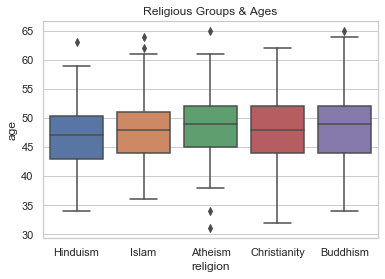

In [15]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=religion_df["religion"], y = religion_df["age"], data = religion_df)
ax.title.set_text('Religious Groups & Ages')

So, it would appear that the is nothing of significance going on in the dataset, which we could say is accruate given that all the data was ditributed across the same mean when we created the _religion_ages_ variable. Let's see what we can get if we manipulate the data to suit our requirements, let's change get a differently-set distribution for one of our groups. Suppose those who hold a faith have a lower mean age as opposed to those who don't. Let's see what sort a p-value we get when Atheists have a mean age of.....33.

In [16]:
# Re-create the random dataset

religions = ["Christianity", "Islam", "Atheism", "Hinduism", "Buddhism"]
percentage_rels = [.34, .26, .16, .16, .08]


rng = np.random.default_rng(42)

pop_rel = rng.choice(a = religions, p = percentage_rels, size = 1000)



#Copying from our above poisson distribution
four_religion_ages = stats.poisson.rvs(loc=18, mu=30, size=1000)
atheist_religion_ages = stats.poisson.rvs(loc=18, mu=33, size=1000)

#np.where - if condition met pick from x, if not pick from y
religion_ages_two = np.where(pop_rel=="Atheism", atheist_religion_ages, four_religion_ages)


#Add both vales to a dataframe
religion_df_two = pd.DataFrame({"religion": pop_rel, "age": religion_ages})
groups = religion_df.groupby("religion").groups

# Create varaible for each individual group
christian_two = religion_ages_two[groups["Christianity"]]
islam_two = religion_ages_two[groups["Islam"]]
atheism_two = religion_ages_two[groups["Atheism"]]
hinduism_two = religion_ages_two[groups["Hinduism"]]
buddhism_two = religion_ages_two[groups["Buddhism"]]

Fingers crossed, lets hope that we get the expected result. We are epxecting there to be a p-value indicating that not all the means within the dataset are in line, there is a level of vairance, a p-value of less than 0.05 is the desired outcome.

In [17]:
ANOVA_oneway_stat_two,  ANOVA_oneway_pval_two= stats.f_oneway(christian_two, islam_two, atheism_two, hinduism_two, buddhism_two)
print(f"The F statistic of the religious populations is {ANOVA_oneway_stat_two:.2f}, the P-value is {ANOVA_oneway_pval_two}")

The F statistic of the religious populations is 10.92, the P-value is 1.1340625852845006e-08


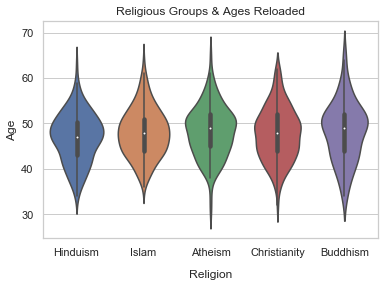

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=religion_df_two["religion"], y = religion_df_two["age"], data = religion_df_two)
#ax.title.set_text('Religious Groups & Ages Reloaded')
ax.set(ylabel='Age', title ='Religious Groups & Ages Reloaded')
ax.set_xlabel(xlabel='Religion', labelpad=12.0,);


In [19]:
print(religion_ages_two[groups["Christianity"]].mean())
print(religion_ages_two[groups["Islam"]].mean())
print(religion_ages_two[groups["Atheism"]].mean())
print(religion_ages_two[groups["Hinduism"]].mean())
print(religion_ages_two[groups["Buddhism"]].mean())


47.42329545454545
48.44223107569721
50.93197278911565
48.2906976744186
47.8974358974359


Well, what a surprise! That worked exactly as we expected. So we can see how changing the mean will affect our p-value, so in the dataset we have created, _religion_df_two_, at least one of the averages ages is not in line with the other groups, but how do we know which? Below we will explore some "post-hoc tests"   to see how we would pin-point where the interest occurs. Firstly, lets compare each of the groups individually, with t-tests like we have done above. 

In [20]:
rel_pairs = []

# nested loop to create pairs of items in the list
for rel_one in range(len(religions)+1):
    # start at next value to rel_one for len list
    for rel_two in range((rel_one+1),(len(religions))):
        #append list items to rel_pairs list
        rel_pairs.append((religions[rel_one], religions[rel_two]))
        
#Lets get our ANOVA test data
for rel_one, rel_two in rel_pairs:
    #This line just assigns variable names to the F statistic & p-value output from the ANOVA test used to ease printing
    anova_stats, anova_pvals=(stats.ttest_ind(religion_ages_two[groups[rel_one]], 
                          religion_ages_two[groups[rel_two]]))
    if anova_pvals < 0.01:
        print(f"Pair of {rel_one} and {rel_two} has a p_value of {anova_pvals}")
        mean_one, mean_two = religion_ages_two[groups[rel_one]].mean(), religion_ages_two[groups[rel_two]].mean()
        print(f"The mean age of {rel_one} is {mean_one} and of {rel_two} is {mean_two}\n")
    elif anova_pvals < 0.05:
        print(f"Pair of {rel_one} and {rel_two} has a p_value of {anova_pvals}")
        mean_one, mean_two = religion_ages_two[groups[rel_one]].mean(), religion_ages_two[groups[rel_two]].mean()
        print(f"The mean age of {rel_one} is {mean_one} and of {rel_two} is {mean_two}\n")

Pair of Christianity and Islam has a p_value of 0.021040189591706268
The mean age of Christianity is 47.42329545454545 and of Islam is 48.44223107569721

Pair of Christianity and Atheism has a p_value of 3.972757766857085e-11
The mean age of Christianity is 47.42329545454545 and of Atheism is 50.93197278911565

Pair of Islam and Atheism has a p_value of 2.6232486399316734e-05
The mean age of Islam is 48.44223107569721 and of Atheism is 50.93197278911565

Pair of Atheism and Hinduism has a p_value of 6.231545007043036e-05
The mean age of Atheism is 50.93197278911565 and of Hinduism is 48.2906976744186

Pair of Atheism and Buddhism has a p_value of 8.935705463699627e-05
The mean age of Atheism is 50.93197278911565 and of Buddhism is 47.8974358974359



So funnily enough, when preparing the data, there was an interesting difference between Christianity and Islam mean ages, but it is just over 2%. Had this been two samples taken from a larger pool we can see how eay it is to run into a false positive or Type I error. This is a prime example of an unlikely result due to chance, which conveniently leads us to a correction we will be making to the significance level required, the Bonferroni Correction[6](https://mathworld.wolfram.com/BonferroniCorrection.html). This correction states that "the alpha value needs to be lowered to account for the number of comparisons being performed", in other words, our significance level will need to be adjusted to account for the number of comparisons made, in our case the length of our rel_pairs array (10). So we are looking for p-values of 0.5%, or 0.005. The Bonferroni Correction is not a foll proof methd, and can end up overlooking results of significance, if say we were to complete 100 comparisons, and a further deciaml movement was included in the correction, do you belive that 1/10,000 is a significant probaility of the even arising due to chance? I'd probably play the lotto every week, but wouldn't put my life in it's hands.


Fixing this issue would require changing the level of significance, from 5% to 1%. For the purposes of this explaination we will just consider the differences in the means that have a very low percentage of being down to chance. Initially I talked aboutt he benefit of running an ANOVA test is that you dont have to run t-tests for each pair within the group. So is that just to see if there is something interesting going on within the data? 

***
__Below needs deleting/amending__

Below we are going to try to run an ANOVA test on quite a famous dataset, the [Pima Indians Diabetes dataset](https://data.world/data-society/pima-indians-diabetes-database) and see how our variances line 
up.
***

References: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html



https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/


3. https://en.wikipedia.org/wiki/Effect_size

4.  https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.plot_power.html

5. https://en.wikipedia.org/wiki/List_of_religious_populations